(512, 512)


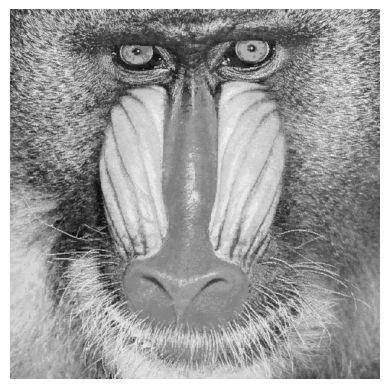

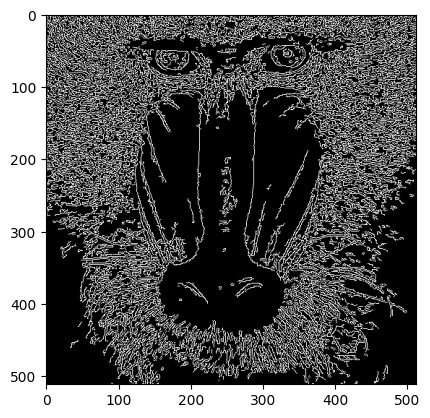

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg') 


#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()

#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

0.4296875
[[0.396484375, 6], [0.4296875, 12], [0.3984375, 15], [0.390625, 20], [0.392578125, 21], [0.388671875, 88], [0.4140625, 100]]
7


(0.0, 512.0)

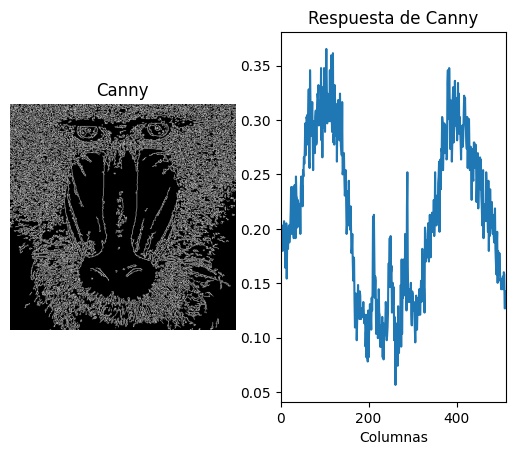

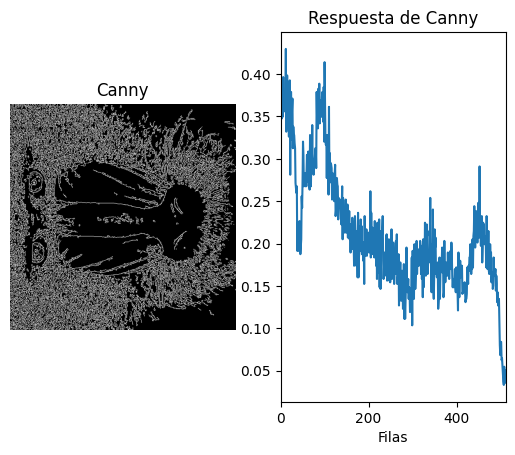

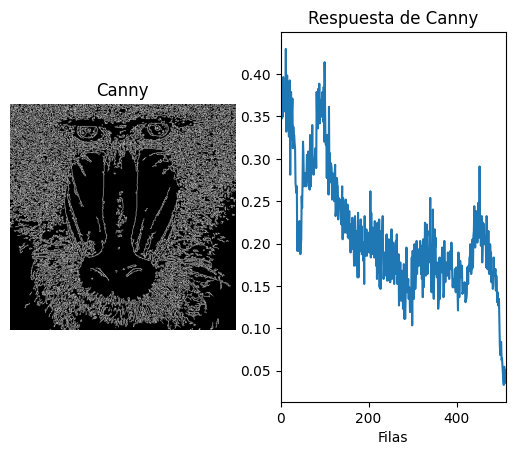

In [ ]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna

canny_rotated = cv2.rotate(canny, cv2.ROTATE_90_COUNTERCLOCKWISE)

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts_rotated = cv2.reduce(canny_rotated, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])
cols_rotated = col_counts_rotated[0] / (255 * canny.shape[0])
rows = row_counts[:] / (255 * canny.shape[0])

queue = []
count = 0
max_row = np.max(rows)
print(max_row)
for row in rows:

    if (row.item() >= max_row*0.9):
        queue.append([row.item(), count])
    count +=1
print(queue)
print(len(queue))

#Muestra dicha cuenta gráficamente
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

#Imagen rotada
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny_rotated, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(cols_rotated)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

#Hecho con row_count
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columna
plt.xlim([0, canny.shape[1]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Datos por filas
0.2830078125
0.314453125
[[0.302734375, 3], [0.291015625, 4], [0.291015625, 20], [0.294921875, 51], [0.296875, 81], [0.314453125, 82], [0.30078125, 83]]
7
Datos por columnas
0.3146484375
0.349609375
[[0.349609375, 288]]
1


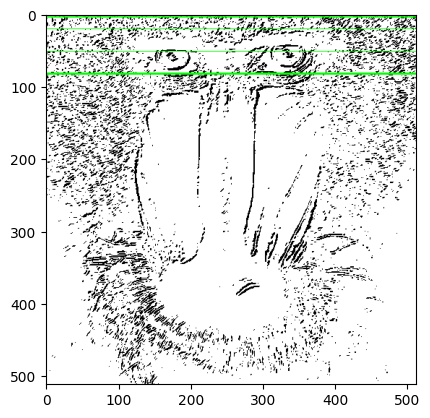

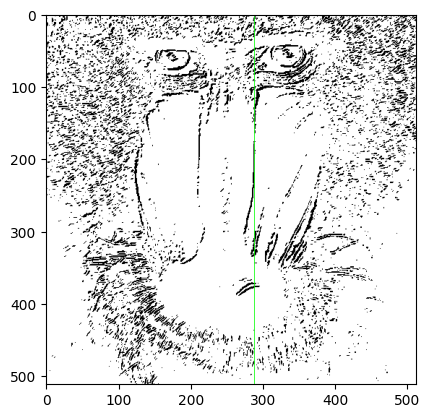

In [29]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

sobel8 = cv2.convertScaleAbs(sobel)

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
_, imagenUmbralizada_sobel = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)


col_counts_sobel8 = cv2.reduce(imagenUmbralizada_sobel, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_counts_sobel8 = cv2.reduce(imagenUmbralizada_sobel, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

col_sobel8 = col_counts_sobel8[0] / (255 * sobel8.shape[0])
rows_sobel8 = rows_counts_sobel8[:] / (255 * sobel8.shape[0])

max_col = np.max(col_sobel8)
max_row = np.max(rows_sobel8)

print("Datos por filas")

print(max_row*0.9)
print(max_row)

count=0
queue_row = []
for row in rows_sobel8:
    if (row.item() >= max_row*0.9):
        queue_row.append([row.item(),count])
    count+=1
print(queue_row)
print(len(queue_row))

print("Datos por columnas")
print(max_col*0.9)
print(max_col)

count=0
queue_col = []

for col in col_sobel8:
    if (col.item() >= max_col*0.9):
        queue_col.append([col.item(),count])
    count+=1
print(queue_col)
print(len(queue_col))

rango_columnas = cv2.inRange(imagenUmbralizada_sobel, max_col*0.9, max_col*1.)
rango_filas = cv2.inRange(imagenUmbralizada_sobel, max_row*0.9, max_row*1.)

imagen_marcada_columnas = cv2.cvtColor(rango_columnas, cv2.COLOR_GRAY2BGR)
imagen_marcada_filas = cv2.cvtColor(rango_filas, cv2.COLOR_GRAY2BGR)

#coger tamaños de la imagen
alto, ancho = imagenUmbralizada_sobel.shape[:2]


#Dibujar filas
for valor, row in queue_row:
    cv2.line(imagen_marcada_filas, (0, row), (ancho, row), (0, 255, 0), 1)

#Dibujar columnas
for valor, col in queue_col:
    cv2.line(imagen_marcada_columnas, (col, 0), (col, alto), (0, 255, 0), 1)

imagen_marcada_filas = cv2.cvtColor(imagen_marcada_filas, cv2.COLOR_BGR2RGB)
imagen_marcada_columnas = cv2.cvtColor(imagen_marcada_columnas, cv2.COLOR_BGR2RGB)


plt.imshow(imagen_marcada_filas)
plt.show()
plt.imshow(imagen_marcada_columnas)
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [38]:
vid = cv2.VideoCapture(0)

def filtro_pixelado(frame, pixel):
    new_width = frame.shape[1] // pixel
    new_height = frame.shape[0] // pixel
    new_dimensions = (new_width, new_height)
    frame = cv2.GaussianBlur(frame, (15,15), 0)

    downscaled_image = cv2.resize(frame, new_dimensions, interpolation=cv2.INTER_AREA)
    downscaled_image = cv2.resize(downscaled_image,(frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)

    return downscaled_image

def filtro_color(frame, select_color):
    r = frame[:,:,2]
    g = frame[:,:,1]
    b = frame[:,:,0]

    match (select_color):
        case 0:
            frame[:,:,0] = 255 - r
            frame[:,:,1] = g
            frame[:,:,2] = b
            return frame
        case 1:
            frame[:,:,0] = r
            frame[:,:,1] = 255 - g
            frame[:,:,2] = b
            return frame
        case 2:
            frame[:,:,0] = b
            frame[:,:,1] = 255 - g
            frame[:,:,2] = 255 - r
            return frame
        case 3:
            frame[:,:,0] = b
            frame[:,:,1] = r
            frame[:,:,2] = g
            return frame
        case 4:
            frame[:,:,0] = r
            frame[:,:,1] = g
            frame[:,:,2] = r
            return frame
        case 5:
            frame[:,:,0] = 255 - b
            frame[:,:,1] = 255 - g
            frame[:,:,2] = 255 - r
            return frame         
        case 6:
            frame[:,:,0] = r
            frame[:,:,1] = 255 - g
            frame[:,:,2] = 255 - b 
            return frame
        case 7:
            frame[:,:,0] = 255 - b
            frame[:,:,1] = r
            frame[:,:,2] = 255 - g
            return frame
        case 8:
            frame[:,:,0] = 255 - r
            frame[:,:,1] = 255 - g
            frame[:,:,2] = 255 - b
            return frame
        case default:
            return frame

def filtro_coloreado_bordes(frame):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(gris, 100, 200)
    contador, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame, contador,  -1, (0,255,255), 2)
    print(len(contador))
    return bordes, frame

def filtro_detectar_movimiento(frame, prev_frame):
    eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=10, detectShadows=False)

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    prev_gray = cv2.GaussianBlur(prev_gray, (21,21), 0)
    prev_edges = cv2.Canny(prev_gray, 100, 200)
    actual_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    actual_gray = cv2.GaussianBlur(actual_gray, (21,21), 0)
    actual_edges = cv2.Canny(actual_gray, 100, 200)

    diff = cv2.absdiff(prev_gray, actual_gray)  
    _, umbral = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    imagen_procesada = umbral.copy()
    imagen_procesada = cv2.dilate(imagen_procesada, None, iterations=2)
    imagen_procesada = cv2.erode(imagen_procesada, None, iterations=2)

    contornos, _ = cv2.findContours(imagen_procesada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    copia = frame.copy()
    for cnt in contornos:
        if cv2.contourArea(cnt)  < 1000:
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(copia, (x,y), (x+w, y+h), (0,255,0), 3)
    return copia

#inicio en modo base
modo = "base"

select_color = 9
 
ret, prev_frame = vid.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_edges = cv2.Canny(prev_gray, 100, 200)

while(True):
    ret, frame = vid.read()

    if ret:
        key = cv2.waitKey(20)

        #teclas para elegir modo
        if key == 97:
            modo = "pixelado"
        if key == 98:
            if select_color == 9:
                select_color = 0
            else:
                select_color +=1
            modo = "color"
        if key == 100:
            modo = "detector_mov"
        if key == 107:
            modo = "contornos"
        if key == 113:
            modo = "base"
        

        #llamadas a las funciones de los filtros para pasar la imagen alterada
        if modo == "base":
            image = frame
        if modo == "pixelado":
            image = filtro_pixelado(frame, 16)
        if modo == "color":
            image = filtro_color(frame, select_color)
        if modo == "contornos":
            bordes, image = filtro_coloreado_bordes(frame)
            cv2.imshow('Bordes detectados', bordes)
        if modo == "detector_mov":
            image = filtro_detectar_movimiento(frame, prev_frame)

        #mostrar imagen con el modo elegido
        cv2.imshow('Camara', image)

        #salir de la ejecución
        if key == 27:
            break
        prev_frame = frame

vid.release()

cv2.destroyAllWindows()

246
275
264
273
282
270
277
260
261
270
256
256
269
269
258
242
260
269
270
251
253
253
252
283
259
276
283
261
268
279
279
291
294
285
258
276
278
275
271
266
282
270
250
255
273
273
254
257
265
292
244
268
269
267
260
268
263
268
277
280
269
244
267
274
251
244
251
262
247
257
277
254
264
253
248
257
251
261
246
256
265
256
282
265
268
271
277
280
275
272
260
252
278
263
274
282
268
270
262
267
277
259
276
268
271
269
270
254
251
293
290
273
286
279
279
286
260
254
254
288
282
262
270
281
258
242
251
247
234
217
183
151
125
141
148
151
167
178
209
200
205
210
193
212
214
241
232
248
292
271
281
293
239
225
225
239
239
196
159
95
95
80
76
84
84
181
188
190
207
212
222
244
236
211
201
214
221
189
209
202
217
214
204
218
211
206
202
198
201
199
199
214
196
190
194
189
201
192
187
189
196
186
202
183
183
172
207
185
187
202
176
205
186
199
213
199
203
213
200
194
196
186
193
218
214
207
209
224
209
199
199
202
194
202
215
190
217
218
198
214
222
215
244
213
220
214
230
210
217
227
229
22

TAREA: Tras ver los vídeos My little piece of privacy, Messa di voce y Virtual air guitar proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()


while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fgmask = fgbg.apply(gray)
    blur = cv2.GaussianBlur(fgmask, (15, 15), 0)

    contours, _ = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    overlay = frame.copy()

    for cnt in contours:
        if cv2.contourArea(cnt) > 2000: 
            mask = np.zeros_like(frame, dtype=np.uint8)
            cv2.drawContours(mask, [cnt], -1, (255,255,255), -1)

            grid = np.zeros_like(frame, dtype=np.uint8)
            step = 10
            for y in range(0, frame.shape[0], step):
                for x in range(0, frame.shape[1], step):
                    if (x//step + y//step) % 2 == 0:
                        cv2.rectangle(grid, (x,y), (x+step, y+step), (100,100,100), -1)

            grid_masked = cv2.bitwise_and(grid, mask)
            alpha = 0.6
            overlay = cv2.addWeighted(grid_masked, alpha, overlay, 1 - alpha, 0)


    cv2.imshow("Cortina", overlay)
    cv2.imshow("Mascara", blur)

    # Salir de la ejecución
    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


